## Chapter 5 Code - Python 3 version

### glassENetRegCV.py

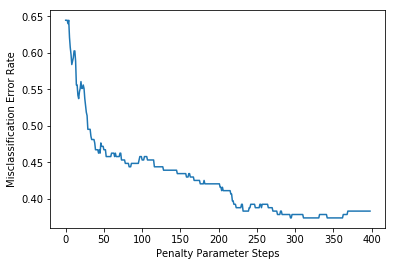

Minimum Missclassification Error Rate
0.37383177570093457


In [1]:
import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.linear_model import enet_path
from sklearn.metrics import roc_auc_score, roc_curve
import numpy


target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
data = urllib.request.urlopen(target_url)

#arrange data into list for labels and list of lists for attributes
xList = []
for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

names = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

#Separate attributes and labels
xNum = []
labels = []

for row in xList:
    labels.append(row.pop())
    l = len(row)
    #eliminate ID
    attrRow = [float(row[i]) for i in range(1, l)]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

#creat one versus all label vectors
#get distinct glass types and assign index to each
yOneVAll = []
labelSet = set(labels)
labelList = list(labelSet)
labelList.sort()
nlabels = len(labelList)
for i in range(nrow):
    yRow = [0.0]*nlabels
    index = labelList.index(labels[i])
    yRow[index] = 1.0
    yOneVAll.append(yRow)

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#normalize y's to center
yMeans = []
ySD = []
for i in range(nlabels):
    col = [yOneVAll[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    yMeans.append(mean)
    colDiff = [(yOneVAll[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    ySD.append(stdDev)

yNormalized = []
for i in range(nrow):
    rowNormalized = [(yOneVAll[i][j] - yMeans[j])/ySD[j] for j in range(nlabels)]
    yNormalized.append(rowNormalized)


#number of cross validation folds
nxval = 10
nAlphas=400
misClass = [0.0] * nAlphas

for ixval in range(nxval):
    #Define test and training index sets
    idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
    idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]

    #Define test and training attribute and label sets
    xTrain = numpy.array([xNormalized[r] for r in idxTrain])
    xTest = numpy.array([xNormalized[r] for r in idxTest])
    yTrain = [yNormalized[r] for r in idxTrain]
    yTest = [yNormalized[r] for r in idxTest]
    labelsTest = [labels[r] for r in idxTest]

    #build model for each column in yTrain
    models = []
    lenTrain = len(yTrain)
    lenTest = nrow - lenTrain

    for iModel in range(nlabels):
        yTemp = numpy.array([yTrain[j][iModel] for j in range(lenTrain)])
        models.append(enet_path(xTrain, yTemp,l1_ratio=1.0, fit_intercept=False, eps=0.5e-3, n_alphas=nAlphas , return_models=False))

    for iStep in range(1,nAlphas):
        #Assemble the predictions for all the models, find largest prediction and calc error
        allPredictions = []
        for iModel in range(nlabels):
            _, coefs, _ = models[iModel]
            predTemp = list(numpy.dot(xTest, coefs[:,iStep]))
            #un-normalize the prediction for comparison
            predUnNorm = [(predTemp[j]*ySD[iModel] + yMeans[iModel]) for j in range(len(predTemp))]
            allPredictions.append(predUnNorm)

        predictions = []
        for i in range(lenTest):
            listOfPredictions = [allPredictions[j][i] for j in range(nlabels) ]
            idxMax = listOfPredictions.index(max(listOfPredictions))
            if labelList[idxMax] != labelsTest[i]:
                misClass[iStep] += 1.0

misClassPlot = [misClass[i]/nrow for i in range(1, nAlphas)]

plot.plot(misClassPlot)

plot.xlabel("Penalty Parameter Steps")
plot.ylabel(("Misclassification Error Rate"))
plot.show()

print("Minimum Missclassification Error Rate")
print(min(misClassPlot))

### rocksVMinesCoefCurves.py

/home/mike/Applications/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


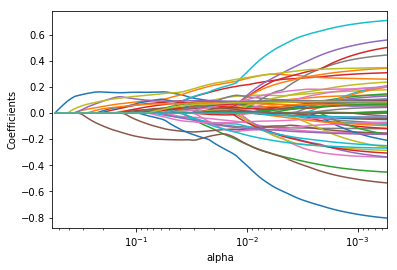

Attributes Ordered by How Early They Enter the Model
['V10', 'V48', 'V11', 'V44', 'V35', 'V51', 'V20', 'V3', 'V21', 'V45', 'V43', 'V15', 'V0', 'V22', 'V27', 'V50', 'V53', 'V30', 'V58', 'V56', 'V28', 'V39', 'V46', 'V19', 'V54', 'V29', 'V57', 'V6', 'V8', 'V7', 'V49', 'V2', 'V23', 'V37', 'V55', 'V4', 'V13', 'V36', 'V38', 'V26', 'V31', 'V1', 'V34', 'V33', 'V24', 'V16', 'V17', 'V5', 'V52', 'V41', 'V40', 'V59', 'V12', 'V9', 'V18', 'V14', 'V47', 'V42']

Best Coefficient Values 
[0.082258256813765626, 0.002061988722006605, -0.11828642590856027, 0.1663395693249955, 0.0042854388193730381, -0.0, -0.043662524745941997, -0.077515104879426602, 0.10000054356323407, 0.0, 0.090617207036281927, 0.21210870399915741, -0.0, -0.010655386149822001, -0.0, -0.13328659558143741, -0.0, 0.0, 0.0, 0.052814854501414883, 0.03853115479672567, 0.0035515348181779059, 0.090854714680385848, 0.030316113904023431, -0.0, 0.0, 0.0086195542357475653, 0.0, 0.0, 0.1749767925727248, -0.22156878046172016, 0.012614243827936883, 0.

In [2]:
__author__ = 'mike_bowles'
import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.linear_model import enet_path
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

alpha = 1.0

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#normalize labels to center

meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]

#Convert normalized labels to numpy array
Y = numpy.array(labelNormalized)

#Convert normalized attributes to numpy array
X = numpy.array(xNormalized)

alphas, coefs, _ = enet_path(X, Y,l1_ratio=0.8, fit_intercept=False, return_models=False)

plot.plot(alphas,coefs.T)

plot.xlabel('alpha')
plot.ylabel('Coefficients')
plot.axis('tight')
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.show()

nattr, nalpha = coefs.shape

#find coefficient ordering
nzList = []
for iAlpha in range(1,nalpha):
    coefList = list(coefs[: ,iAlpha])
    nzCoef = [index for index in range(nattr) if coefList[index] != 0.0]
    for q in nzCoef:
        if not(q in nzList):
            nzList.append(q)

#make up names for columns of X
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]
print("Attributes Ordered by How Early They Enter the Model")
print(nameList)
print('')

#find coefficients corresponding to best alpha value. alpha value corresponding to
#normalized X and normalized Y is 0.020334883589342503

alphaStar = 0.020334883589342503
indexLTalphaStar = [index for index in range(100) if alphas[index] > alphaStar]
indexStar = max(indexLTalphaStar)

#here's the set of coefficients to deploy
coefStar = list(coefs[:,indexStar])
print("Best Coefficient Values ")
print(coefStar)
print('')

#The coefficients on normalized attributes give another slightly different ordering

absCoef = [abs(a) for a in coefStar]

#sort by magnitude
coefSorted = sorted(absCoef, reverse=True)

idxCoefSize = [absCoef.index(a) for a in coefSorted if not(a == 0.0)]

namesList2 = [names[idxCoefSize[i]] for i in range(len(idxCoefSize))]

print("Attributes Ordered by Coef Size at Optimum alpha")
print(namesList2)

### rocksVMinesENetRegCV.py

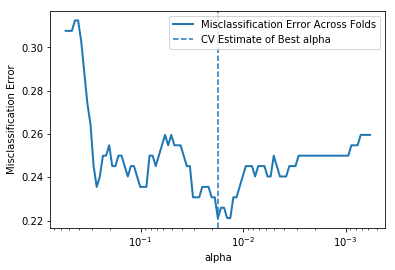

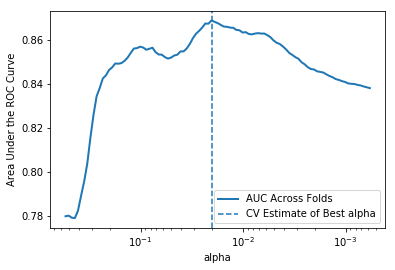

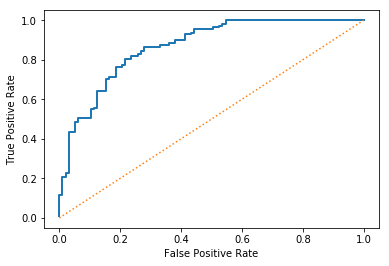

Best Value of Misclassification Error =  0.22115384615384615
Best alpha for Misclassification Error =  0.0176862447202

Best Value for AUC =  0.868672796508
Best alpha for AUC   =   0.0203348835893

Confusion Matrices for Different Threshold Values
Threshold Value =    0.21560082129
TP =  61.0 FP =  11.0
FN =  50.0 TN =  86.0
Threshold Value =    -0.0943518921617
TP =  89.0 FP =  23.0
FN =  22.0 TN =  74.0
Threshold Value =    -0.322369381872
TP =  100.0 FP =  40.0
FN =  11.0 TN =  57.0


In [5]:
__author__ = 'mike_bowles'
import urllib.request, urllib.error, urllib.parse
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.linear_model import enet_path
from sklearn.metrics import roc_auc_score, roc_curve
import numpy

#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#normalize labels to center
#Normalize labels
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrow)]


#number of cross validation folds
nxval = 10


for ixval in range(nxval):
    #Define test and training index sets
    idxTest = [a for a in range(nrow) if a%nxval == ixval%nxval]
    idxTrain = [a for a in range(nrow) if a%nxval != ixval%nxval]

    #Define test and training attribute and label sets
    xTrain = numpy.array([xNormalized[r] for r in idxTrain])
    xTest = numpy.array([xNormalized[r] for r in idxTest])
    labelTrain = numpy.array([labelNormalized[r] for r in idxTrain])
    labelTest = numpy.array([labelNormalized[r] for r in idxTest])

    alphas, coefs, _ = enet_path(xTrain, labelTrain,l1_ratio=0.8, fit_intercept=False, return_models=False)

    #apply coefs to test data to produce predictions and accumulate
    if ixval == 0:
        pred = numpy.dot(xTest, coefs)
        yOut = labelTest
    else:
        #accumulate predictions
        yTemp = numpy.array(yOut)
        yOut = numpy.concatenate((yTemp, labelTest), axis=0)

        #accumulate predictions
        predTemp = numpy.array(pred)
        pred = numpy.concatenate((predTemp, numpy.dot(xTest, coefs)), axis = 0)


#calculate miss classification error
misClassRate = []
_,nPred = pred.shape
for iPred in range(1, nPred):
    predList = list(pred[:, iPred])
    errCnt = 0.0
    for irow in range(nrow):
        if (predList[irow] < 0.0) and (yOut[irow] >= 0.0):
            errCnt += 1.0
        elif (predList[irow] >= 0.0) and (yOut[irow] < 0.0):
            errCnt += 1.0
    misClassRate.append(errCnt/nrow)

#find minimum point for plot and for print
minError = min(misClassRate)
idxMin = misClassRate.index(minError)
plotAlphas = list(alphas[1:len(alphas)])

plot.figure()
plot.plot(plotAlphas, misClassRate, label='Misclassification Error Across Folds', linewidth=2)
plot.axvline(plotAlphas[idxMin], linestyle='--',
            label='CV Estimate of Best alpha')
plot.legend()
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Misclassification Error')
plot.axis('tight')
plot.show()



#calculate AUC.
idxPos = [i for i in range(nrow) if yOut[i] > 0.0]
yOutBin = [0] * nrow
for i in idxPos: yOutBin[i] = 1

auc = []
for iPred in range(1, nPred):
    predList = list(pred[:, iPred])
    aucCalc = roc_auc_score(yOutBin, predList)
    auc.append(aucCalc)

maxAUC = max(auc)
idxMax = auc.index(maxAUC)

plot.figure()
plot.plot(plotAlphas, auc, label='AUC Across Folds', linewidth=2)
plot.axvline(plotAlphas[idxMax], linestyle='--',
            label='CV Estimate of Best alpha')
plot.legend()
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Area Under the ROC Curve')
plot.axis('tight')
plot.show()


#plot best version of ROC curve
fpr, tpr, thresh = roc_curve(yOutBin, list(pred[:, idxMax]))
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()

print('Best Value of Misclassification Error = ', misClassRate[idxMin])
print('Best alpha for Misclassification Error = ', plotAlphas[idxMin])
print('')
print('Best Value for AUC = ', auc[idxMax])
print('Best alpha for AUC   =  ', plotAlphas[idxMax])

print('')
print('Confusion Matrices for Different Threshold Values')

#pick some points along the curve to print.  There are 57 points.  The extremes aren't useful
#Sample at 14, 28 and 42.  Use the calculated values of tpr and fpr along with definitions and
#threshold values.
#Some nomenclature (e.g. see wikkipedia "receiver operating curve")


#P = Positive cases
P = len(idxPos)
#N = Negative cases
N = nrow - P
#TP = True positives = tpr * P
TP = tpr[14] * P
#FN = False negatives = P - TP
FN = P - TP
#FP = False positives = fpr * N
FP = fpr[14] * N
#TN = True negatives = N - FP
TN = N - FP

print('Threshold Value =   ', thresh[14])
print('TP = ', TP, 'FP = ', FP)
print('FN = ', FN, 'TN = ', TN)

TP = tpr[28] * P; FN = P - TP; FP = fpr[28] * N; TN = N - FP

print('Threshold Value =   ', thresh[28])
print('TP = ', TP, 'FP = ', FP)
print('FN = ', FN, 'TN = ', TN)

TP = tpr[42] * P; FN = P - TP; FP = fpr[42] * N; TN = N - FP

print('Threshold Value =   ', thresh[42])
print('TP = ', TP, 'FP = ', FP)
print('FN = ', FN, 'TN = ', TN)

### rocksVMinesGlmnet.py

Attributes Ordered by How Early They Enter the Model
['V10', 'V48', 'V11', 'V44', 'V35', 'V51', 'V20', 'V3', 'V50', 'V21', 'V43', 'V47', 'V15', 'V27', 'V0', 'V22', 'V36', 'V30', 'V53', 'V56', 'V58', 'V6', 'V19', 'V28', 'V39', 'V49', 'V7', 'V23', 'V54', 'V8', 'V14', 'V2', 'V29', 'V38', 'V57', 'V45', 'V13', 'V32', 'V31', 'V42', 'V16', 'V37', 'V59', 'V52', 'V25', 'V18', 'V1', 'V33', 'V4', 'V55', 'V17', 'V46', 'V26', 'V12', 'V40', 'V34', 'V5', 'V24', 'V41', 'V9']


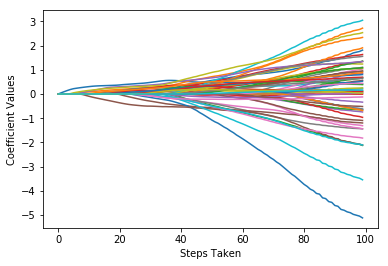

In [1]:
__author__ = 'mike_bowles'
import urllib.request, urllib.error, urllib.parse
import sys
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot

def S(z,gamma):
    if gamma >= fabs(z):
        return 0.0
    if z > 0.0:
        return z - gamma
    else:
        return z + gamma

def Pr(b0,b,x):
    n = len(x)
    sum = b0
    for i in range(n):
        sum += b[i]*x[i]
        if sum < -100: sum = -100
    return 1.0/(1.0 + exp(-sum))


#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

alpha = 0.8
#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#Do Not Normalize labels but do calculate averages
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

#initialize probabilities and weights
sumWxr = [0.0] * ncol
sumWxx = [0.0] * ncol
sumWr = 0.0
sumW = 0.0

#calculate starting points for betas
for iRow in range(nrow):
    p = meanLabel
    w = p * (1.0 - p)
    #residual for logistic
    r = (labels[iRow] - p) / w
    x = xNormalized[iRow]
    sumWxr = [sumWxr[i] + w * x[i] * r for i in range(ncol)]
    sumWxx = [sumWxx[i] + w * x[i] * x[i] for i in range(ncol)]
    sumWr = sumWr + w * r
    sumW = sumW + w

avgWxr = [sumWxr[i]/nrow for i in range(ncol)]
avgWxx = [sumWxx[i]/nrow for i in range(ncol)]

maxWxr = 0.0
for i in range(ncol):
    val = abs(avgWxr[i])
    if val > maxWxr:
        maxWxr = val

#calculate starting value for lambda
lam = maxWxr/alpha

#this value of lambda corresponds to beta = list of 0's
#initialize a vector of coefficients beta
beta = [0.0] * ncol
beta0 = sumWr/sumW

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

beta0List = []
beta0List.append(beta0)

#begin iteration
nSteps = 100
lamMult = 0.93 #100 steps gives reduction by factor of 1000 in lambda (recommended by authors)
nzList = []
for iStep in range(nSteps):
    #decrease lambda
    lam = lam * lamMult


    #Use incremental change in betas to control inner iteration


    #set middle loop values for betas = to outer values
    # values are used for calculating weights and probabilities
    #inner values are used for calculating penalized regression updates

    #take pass through data to calculate averages over data require for iteration
    #initilize accumulators

    betaIRLS = list(beta)
    beta0IRLS = beta0
    distIRLS = 100.0
    #Middle loop to calculate new betas with fixed IRLS weights and probabilities
    iterIRLS = 0
    while distIRLS > 0.01:
        iterIRLS += 1
        iterInner = 0.0

        betaInner = list(betaIRLS)
        beta0Inner = beta0IRLS
        distInner = 100.0
        while distInner > 0.01:
            iterInner += 1
            if iterInner > 100: break

            #cycle through attributes and update one-at-a-time
            #record starting value for comparison
            betaStart = list(betaInner)
            for iCol in range(ncol):

                sumWxr = 0.0
                sumWxx = 0.0
                sumWr = 0.0
                sumW = 0.0

                for iRow in range(nrow):
                    x = list(xNormalized[iRow])
                    y = labels[iRow]
                    p = Pr(beta0IRLS, betaIRLS, x)
                    if abs(p) < 1e-5:
                        p = 0.0
                        w = 1e-5
                    elif abs(1.0 - p) < 1e-5:
                        p = 1.0
                        w = 1e-5
                    else:
                        w = p * (1.0 - p)

                    z = (y - p) / w + beta0IRLS + sum([x[i] * betaIRLS[i] for i in range(ncol)])
                    r = z - beta0Inner - sum([x[i] * betaInner[i] for i in range(ncol)])
                    sumWxr += w * x[iCol] * r
                    sumWxx += w * x[iCol] * x[iCol]
                    sumWr += w * r
                    sumW += w

                avgWxr = sumWxr / nrow
                avgWxx = sumWxx / nrow

                beta0Inner = beta0Inner + sumWr / sumW
                uncBeta = avgWxr + avgWxx * betaInner[iCol]
                betaInner[iCol] = S(uncBeta, lam * alpha) / (avgWxx + lam * (1.0 - alpha))

            sumDiff = sum([abs(betaInner[n] - betaStart[n]) for n in range(ncol)])
            sumBeta = sum([abs(betaInner[n]) for n in range(ncol)])
            distInner = sumDiff/sumBeta
        #print number of steps for inner and middle loop convergence to monitor behavior
        #print(iStep, iterIRLS, iterInner)

        #if exit inner while loop, then set betaMiddle = betaMiddle and run through middle loop again.

        #Check change in betaMiddle to see if IRLS is converged
        a = sum([abs(betaIRLS[i] - betaInner[i]) for i in range(ncol)])
        b = sum([abs(betaIRLS[i]) for i in range(ncol)])
        distIRLS = a / (b + 0.0001)
        dBeta = [betaInner[i] - betaIRLS[i] for i in range(ncol)]
        gradStep = 1.0
        temp = [betaIRLS[i] + gradStep * dBeta[i] for i in range(ncol)]
        betaIRLS = list(temp)

    beta = list(betaIRLS)
    beta0 = beta0IRLS
    betaMat.append(list(beta))
    beta0List.append(beta0)

    nzBeta = [index for index in range(ncol) if beta[index] != 0.0]
    for q in nzBeta:
        if not(q in nzList):
            nzList.append(q)

#make up names for columns of xNum
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]

print("Attributes Ordered by How Early They Enter the Model")
print(nameList)
for i in range(ncol):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel("Coefficient Values")
plot.show()

### rvmGlmnet2.py

Attributes Ordered by How Early They Enter the Model
['V10', 'V48', 'V11', 'V44', 'V35', 'V51', 'V20', 'V3', 'V21', 'V50', 'V43', 'V47', 'V15', 'V0', 'V27', 'V22', 'V36', 'V30', 'V53', 'V56', 'V58', 'V6', 'V19', 'V28', 'V39', 'V49', 'V7', 'V8', 'V14', 'V23', 'V54', 'V29', 'V2', 'V38', 'V57', 'V13', 'V45', 'V32', 'V42', 'V31', 'V16', 'V37', 'V59', 'V52', 'V25', 'V18', 'V1', 'V33', 'V4', 'V55', 'V17', 'V46', 'V26', 'V12', 'V40', 'V34', 'V5', 'V24', 'V41', 'V9']


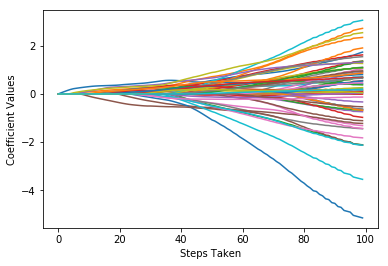

In [2]:
__author__ = 'mike_bowles'
#this version is modified to remove unnecessary repetitive calculations
import urllib.request, urllib.error, urllib.parse
import sys
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
import numpy as np

def S(z,gamma):
    if gamma >= fabs(z):
        return 0.0
    if z > 0.0:
        return z - gamma
    else:
        return z + gamma

def Pr(b0,b,x):
    n = len(x)
    sum = b0
    for i in range(n):
        sum += b[i]*x[i]
        if sum < -100: sum = -100
    return 1.0/(1.0 + exp(-sum))

def adjPW(b0, b, x):  #does adjustments recommended by friedman for num stability
    p = Pr(b0, b, x)
    if abs(p) < 1e-5:
        p = 0.0
        w = 1e-5
    elif abs(1.0 - p) < 1e-5:
        p = 1.0
        w = 1e-5
    else:
        w = p * (1.0 - p)
    return p, w

def calcOuter(X, Y, beta0, beta):
    nRow = len(X)
    nCol = len(X[0])


    wXX = np.zeros((nCol, nCol))
    wX = np.zeros((nCol))
    wXz = np.zeros((nCol))
    wZ = 0.0
    wSum = 0.0

    for iRow in range(nRow):
        y = Y[iRow]
        x = X[iRow]
        p, w = adjPW(beta0, beta, x)
        xNP = np.array(x)

        wXX += w * np.outer(xNP, xNP)   #square matrix with dimension of x
        wX += w * xNP         #vector with same dimension as x
        #residual for logistic
        z = (y - p) / w + beta0 + sum([x[i] * beta[i] for i in range(ncol)])

        wXz += w * xNP * z  #vector of w same dimension as x
        wZ += w * z   #scalar
        wSum += w   #scalar
    return (wXX, wX, wXz, wZ, wSum)



#read data from uci data repository
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
data = urllib.request.urlopen(target_url)


#arrange data into list for labels and list of lists for attributes
xList = []


for line in data:
    #split on comma
    row = line.decode().strip().split(",")
    xList.append(row)

#separate labels from attributes, convert from attributes from string to numeric and convert "M" to 1 and "R" to 0

xNum = []
labels = []

for row in xList:
    lastCol = row.pop()
    if lastCol == "M":
        labels.append(1.0)
    else:
        labels.append(0.0)
    attrRow = [float(elt) for elt in row]
    xNum.append(attrRow)

#number of rows and columns in x matrix
nrow = len(xNum)
ncol = len(xNum[1])

alpha = 0.8
#calculate means and variances
xMeans = []
xSD = []
for i in range(ncol):
    col = [xNum[j][i] for j in range(nrow)]
    mean = sum(col)/nrow
    xMeans.append(mean)
    colDiff = [(xNum[j][i] - mean) for j in range(nrow)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrow)])
    stdDev = sqrt(sumSq/nrow)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xNum
xNormalized = []
for i in range(nrow):
    rowNormalized = [(xNum[i][j] - xMeans[j])/xSD[j] for j in range(ncol)]
    xNormalized.append(rowNormalized)

#Do Not Normalize labels but do calculate averages
meanLabel = sum(labels)/nrow
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrow)])/nrow)

#initialize probabilities and weights
sumWxr = [0.0] * ncol
sumWxx = [0.0] * ncol
sumWr = 0.0
sumW = 0.0

#calculate starting points for betas
for iRow in range(nrow):
    p = meanLabel
    w = p * (1.0 - p)
    #residual for logistic
    r = (labels[iRow] - p) / w
    x = xNormalized[iRow]
    sumWxr = [sumWxr[i] + w * x[i] * r for i in range(ncol)]
    sumWxx = [sumWxx[i] + w * x[i] * x[i] for i in range(ncol)]
    sumWr = sumWr + w * r
    sumW = sumW + w

avgWxr = [sumWxr[i]/nrow for i in range(ncol)]
avgWxx = [sumWxx[i]/nrow for i in range(ncol)]

maxWxr = 0.0
for i in range(ncol):
    val = abs(avgWxr[i])
    if val > maxWxr:
        maxWxr = val

#calculate starting value for lambda
lam = maxWxr/alpha

#this value of lambda corresponds to beta = list of 0's
#initialize a vector of coefficients beta
beta = [0.0] * ncol
beta0 = sumWr/sumW

#initialize matrix of betas at each step
betaMat = []
betaMat.append(list(beta))

beta0List = []
beta0List.append(beta0)

#begin iteration
nSteps = 100
lamMult = 0.93 #100 steps gives reduction by factor of 1000 in lambda (recommended by authors)
nzList = []
for iStep in range(nSteps):
    #decrease lambda
    lam = lam * lamMult


    #Use incremental change in betas to control inner iteration


    #set middle loop values for betas = to outer values
    # values are used for calculating weights and probabilities
    #inner values are used for calculating penalized regression updates

    #take pass through data to calculate averages over data require for iteration
    #initilize accumulators

    betaIRLS = list(beta)
    beta0IRLS = beta0
    distIRLS = 100.0

    #calculations for xx, wxx, etc
    (wXX, wX, wXz, wZ, wSum) = calcOuter(xNormalized, labels, beta0IRLS, betaIRLS)

    #Middle loop to calculate new betas with fixed IRLS weights and probabilities
    iterIRLS = 0
    while distIRLS > 0.01:
        iterIRLS += 1
        iterInner = 0.0

        betaInner = list(betaIRLS)
        beta0Inner = beta0IRLS
        distInner = 100.0
        while distInner > 0.01:
            iterInner += 1
            if iterInner > 100: break

            #cycle through attributes and update one-at-a-time
            #record starting value for comparison
            betaStart = list(betaInner)
            for iCol in range(ncol):

                #z = (y - p) / w + beta0IRLS + sum([x[i] * betaIRLS[i] for i in range(ncol)])
                #r = z - beta0Inner - sum([x[i] * betaInner[i] for i in range(ncol)])
                #sumWxr = w*x[iCol] * {z - beta0Inner - sum x*betaInner}
                #  = wXz[iCol] - wX[iCol]*beta0Inner - wXX[iCol]*betaInner
                #sumWxx = wXX[iCol, iCol]
                #sumWr = wZ - wSum*beta0Inner - wX*betaInner
                sumWxr = wXz[iCol] - wX[iCol]*beta0Inner - np.dot(wXX[iCol], betaInner)
                sumWxx = wXX[iCol, iCol]
                sumWr = wZ - wSum*beta0Inner - np.dot(wX, betaInner)
                sumW = wSum

                avgWxr = sumWxr / nrow
                avgWxx = sumWxx / nrow

                beta0Inner = beta0Inner + sumWr / sumW
                uncBeta = avgWxr + avgWxx * betaInner[iCol]
                betaInner[iCol] = S(uncBeta, lam * alpha) / (avgWxx + lam * (1.0 - alpha))

            sumDiff = sum([abs(betaInner[n] - betaStart[n]) for n in range(ncol)])
            sumBeta = sum([abs(betaInner[n]) for n in range(ncol)])
            distInner = sumDiff/sumBeta
        #print number of steps for inner and middle loop convergence to monitor behavior
        #print(iStep, iterIRLS, iterInner)

        #if exit inner while loop, then set betaMiddle = betaMiddle and run through middle loop again.

        #Check change in betaMiddle to see if IRLS is converged
        a = sum([abs(betaIRLS[i] - betaInner[i]) for i in range(ncol)])
        b = sum([abs(betaIRLS[i]) for i in range(ncol)])
        distIRLS = a / (b + 0.0001)
        dBeta = [betaInner[i] - betaIRLS[i] for i in range(ncol)]
        gradStep = 1.0
        temp = [betaIRLS[i] + gradStep * dBeta[i] for i in range(ncol)]
        betaIRLS = list(temp)

    beta = list(betaIRLS)
    beta0 = beta0IRLS
    betaMat.append(list(beta))
    beta0List.append(beta0)

    nzBeta = [index for index in range(ncol) if beta[index] != 0.0]
    for q in nzBeta:
        if not(q in nzList):
            nzList.append(q)

#make up names for columns of xNum
names = ['V' + str(i) for i in range(ncol)]
nameList = [names[nzList[i]] for i in range(len(nzList))]

print("Attributes Ordered by How Early They Enter the Model")
print(nameList)
for i in range(ncol):
    #plot range of beta values for each attribute
    coefCurve = [betaMat[k][i] for k in range(nSteps)]
    xaxis = range(nSteps)
    plot.plot(xaxis, coefCurve)

plot.xlabel("Steps Taken")
plot.ylabel("Coefficient Values")
plot.show()

### wineExpandedLassoCV.py

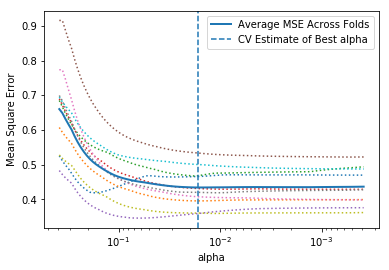

alpha Value that Minimizes CV Error   0.0166404989986
Minimum MSE   0.43452874043


In [3]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plot


#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#append square of last term (alcohol)

for i in range(len(xList)):
    alcElt = xList[i][-1]
    volAcid = xList[i][1]
    temp = list(xList[i])
    temp.append(alcElt*alcElt)
    temp.append(alcElt*volAcid)
    xList[i] = list(temp)

#add new name to variable list
names[-1] = "alco^2"
names.append("alco*volAcid")

#Normalize columns in x and labels
#Note: be careful about normalization.  Some penalized regression packages include it
#and some don't.

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#Convert list of list to np array for input to sklearn packages

#Unnormalized labels
Y = numpy.array(labels)

#normalized lables
#Y = numpy.array(labelNormalized)

#Unnormalized X's
X = numpy.array(xList)

#Normlized Xss
X = numpy.array(xNormalized)

#Call LassoCV from sklearn.linear_model
wineModel = LassoCV(cv=10).fit(X, Y)

# Display results

plot.figure()
plot.plot(wineModel.alphas_, wineModel.mse_path_, ':')
plot.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1),
         label='Average MSE Across Folds', linewidth=2)
plot.axvline(wineModel.alpha_, linestyle='--',
            label='CV Estimate of Best alpha')
plot.semilogx()
plot.legend()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Mean Square Error')
plot.axis('tight')
plot.show()

#print out the value of alpha that minimizes the Cv-error
print("alpha Value that Minimizes CV Error  ",wineModel.alpha_)
print("Minimum MSE  ", min(wineModel.mse_path_.mean(axis=-1)))

### wineLassoCoefCurves.py

/home/mike/Applications/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


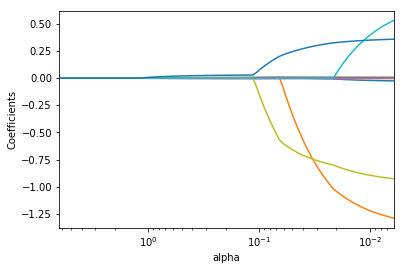

Attributes Ordered by How Early They Enter the Model ['"total sulfur dioxide"', '"alcohol"', '"free sulfur dioxide"', '"pH"', '"volatile acidity"', '"fixed acidity"', '"sulphates"']
Best Coefficient Values  [-0.016469559245771925, -1.1473999479996844, 0.0, 0.0, -0.0, 0.0074250020448315092, -0.0050942618219325152, -0.0, -0.86027897797538899, 0.25313996346144807, 0.34045891414503043]
Attributes Ordered by Coef Size at Optimum alpha ['"volatile acidity"', '"pH"', '"alcohol"', '"sulphates"', '"fixed acidity"', '"free sulfur dioxide"', '"total sulfur dioxide"']


In [5]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#Normalize columns in x and labels
#Note: be careful about normalization.  Some penalized regression packages include it
#and some don't.

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#Convert list of list to np array for input to sklearn packages

#Unnormalized labels
Y = numpy.array(labels)

#normalized lables
Y = numpy.array(labelNormalized)

#Unnormalized X's
X = numpy.array(xList)

#Normlized Xss
#X = numpy.array(xNormalized)

alphas, coefs, _  = linear_model.lasso_path(X, Y,  return_models=False)


plot.plot(alphas,coefs.T)

plot.xlabel('alpha')
plot.ylabel('Coefficients')
plot.axis('tight')
plot.semilogx()
ax = plot.gca()
ax.invert_xaxis()
plot.show()

nattr, nalpha = coefs.shape

#find coefficient ordering
nzList = []
for iAlpha in range(1,nalpha):
    coefList = list(coefs[: ,iAlpha])
    nzCoef = [index for index in range(nattr) if coefList[index] != 0.0]
    for q in nzCoef:
        if not(q in nzList):
            nzList.append(q)

nameList = [names[nzList[i]] for i in range(len(nzList))]
print("Attributes Ordered by How Early They Enter the Model", nameList)

#find coefficients corresponding to best alpha value. alpha value corresponding to
#normalized X and normalized Y is 0.013561387700964642

alphaStar = 0.013561387700964642
indexLTalphaStar = [index for index in range(100) if alphas[index] > alphaStar]
indexStar = max(indexLTalphaStar)

#here's the set of coefficients to deploy
coefStar = list(coefs[:,indexStar])
print("Best Coefficient Values ", coefStar)

#The coefficients on normalized attributes give another slightly different ordering

absCoef = [abs(a) for a in coefStar]

#sort by magnitude
coefSorted = sorted(absCoef, reverse=True)

idxCoefSize = [absCoef.index(a) for a in coefSorted if not(a == 0.0)]

namesList2 = [names[idxCoefSize[i]] for i in range(len(idxCoefSize))]

print("Attributes Ordered by Coef Size at Optimum alpha", namesList2)

### wineLassoCV.py

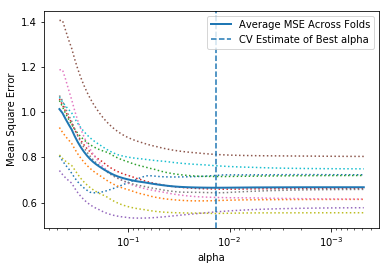

alpha Value that Minimizes CV Error   0.013561387701
Minimum MSE   0.6655849206


In [6]:
__author__ = 'mike-bowles'

import urllib.request, urllib.error, urllib.parse
import numpy
from sklearn import datasets, linear_model
from sklearn.linear_model import LassoCV
from math import sqrt
import matplotlib.pyplot as plot

#read data into iterable
target_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = urllib.request.urlopen(target_url)

xList = []
labels = []
names = []
firstLine = True
for line in data:
    if firstLine:
        names = line.decode().strip().split(";")
        firstLine = False
    else:
        #split on semi-colon
        row = line.decode().strip().split(";")
        #put labels in separate array
        labels.append(float(row[-1]))
        #remove label from row
        row.pop()
        #convert row to floats
        floatRow = [float(num) for num in row]
        xList.append(floatRow)

#Normalize columns in x and labels
#Note: be careful about normalization.  Some penalized regression packages include it
#and some don't.

nrows = len(xList)
ncols = len(xList[0])

#calculate means and variances
xMeans = []
xSD = []
for i in range(ncols):
    col = [xList[j][i] for j in range(nrows)]
    mean = sum(col)/nrows
    xMeans.append(mean)
    colDiff = [(xList[j][i] - mean) for j in range(nrows)]
    sumSq = sum([colDiff[i] * colDiff[i] for i in range(nrows)])
    stdDev = sqrt(sumSq/nrows)
    xSD.append(stdDev)

#use calculate mean and standard deviation to normalize xList
xNormalized = []
for i in range(nrows):
    rowNormalized = [(xList[i][j] - xMeans[j])/xSD[j] for j in range(ncols)]
    xNormalized.append(rowNormalized)

#Normalize labels
meanLabel = sum(labels)/nrows
sdLabel = sqrt(sum([(labels[i] - meanLabel) * (labels[i] - meanLabel) for i in range(nrows)])/nrows)

labelNormalized = [(labels[i] - meanLabel)/sdLabel for i in range(nrows)]

#Convert list of list to np array for input to sklearn packages

#Unnormalized labels
Y = numpy.array(labels)

#normalized lables
Y = numpy.array(labelNormalized)

#Unnormalized X's
X = numpy.array(xList)

#Normlized Xss
X = numpy.array(xNormalized)

#Call LassoCV from sklearn.linear_model
wineModel = LassoCV(cv=10).fit(X, Y)

# Display results


plot.figure()
plot.plot(wineModel.alphas_, wineModel.mse_path_, ':')
plot.plot(wineModel.alphas_, wineModel.mse_path_.mean(axis=-1),
         label='Average MSE Across Folds', linewidth=2)
plot.axvline(wineModel.alpha_, linestyle='--',
            label='CV Estimate of Best alpha')
plot.semilogx()
plot.legend()
ax = plot.gca()
ax.invert_xaxis()
plot.xlabel('alpha')
plot.ylabel('Mean Square Error')
plot.axis('tight')
plot.show()

#print out the value of alpha that minimizes the Cv-error
print("alpha Value that Minimizes CV Error  ",wineModel.alpha_)
print("Minimum MSE  ", min(wineModel.mse_path_.mean(axis=-1)))